Global CO₂ Emissions: A Data-Driven Exploration

In [74]:
import pandas as pd

# Load the dataset from your local path
df = pd.read_csv(r"C:\Users\92300\Downloads\owid-co2-data.csv")

# Check the top few rows
print(df.head())

# Keep only country-level data (exclude 'World', continents, etc.)
df = df[df['iso_code'].str.len() == 3]

# Select columns relevant to your analysis
columns_to_keep = ['country', 'year', 'co2', 'co2_per_capita', 'gdp', 'population']
df = df[columns_to_keep]

# Handle missing values
df = df.dropna(subset=['co2'])  # Drop rows where CO2 is missing
df['gdp'] = df['gdp'].fillna(0)
df['population'] = df['population'].fillna(0)




       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                   NaN   

Analyze Total CO₂ Emissions Over Time Globally

C:\Users\92300\AppData\Local\Temp\ipykernel_5720\81522057.py:13: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\92300\Documents\Python\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


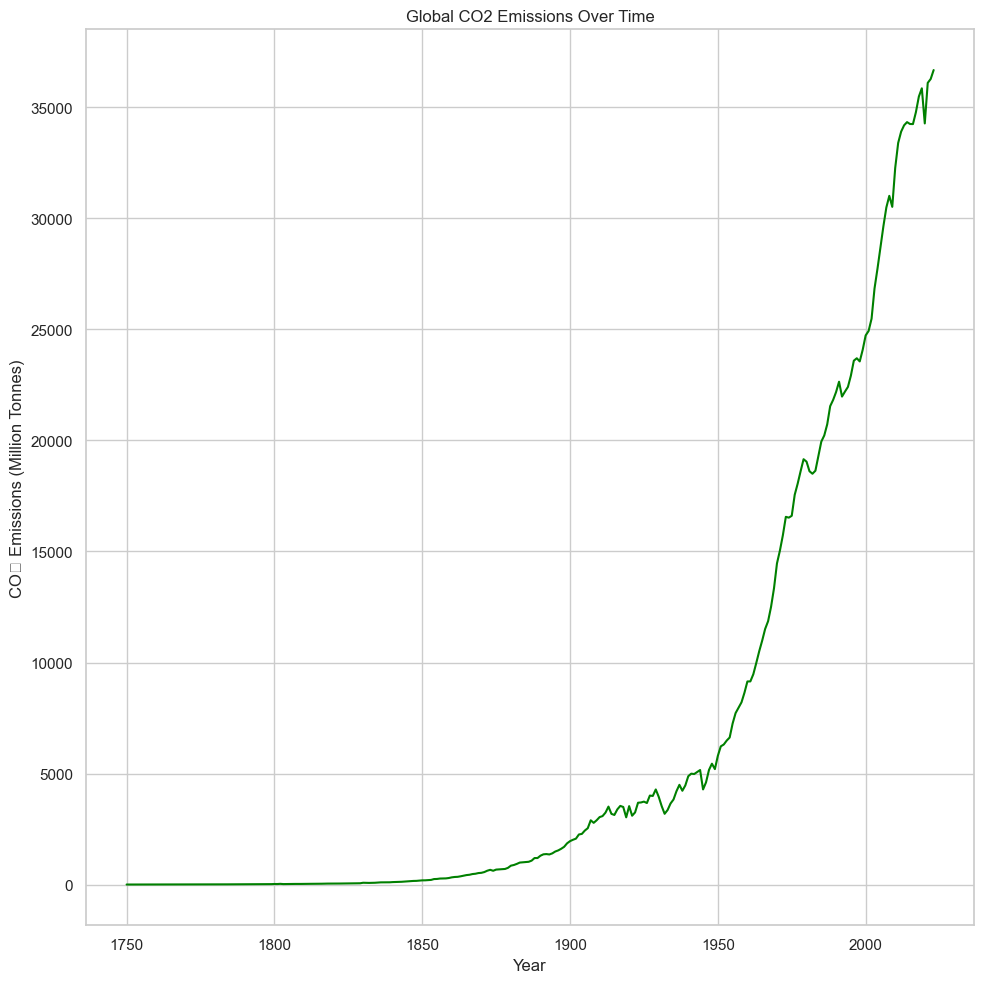

In [75]:
import matplotlib.pyplot as plt

# Group by year and sum CO₂ emissions globally


# Plot
plt.figure(figsize=(10, 10))
plt.plot(global_emissions['year'], global_emissions['co2'], color='green')
plt.title("Global CO2 Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.grid(True)
plt.tight_layout()
plt.show()


Top 10 Emitting Countries in 2020

C:\Users\92300\AppData\Local\Temp\ipykernel_5720\2040317879.py:12: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()


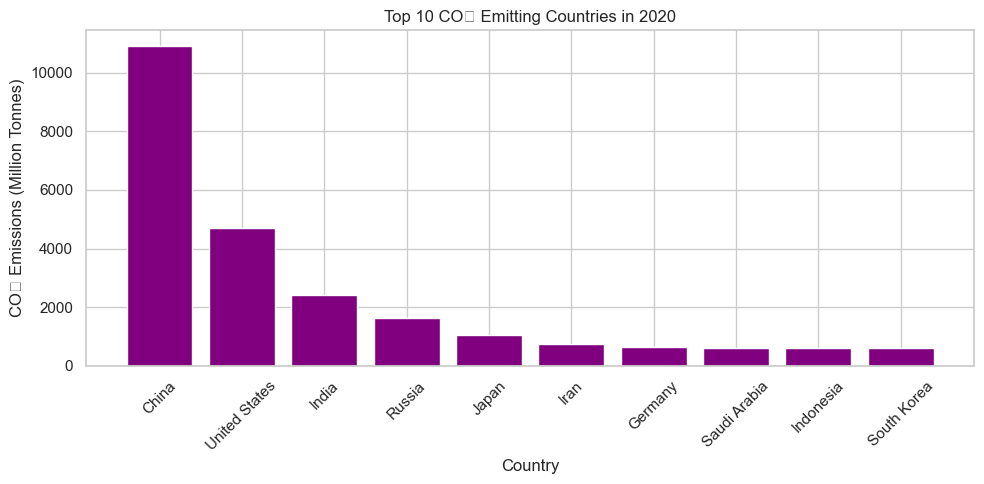

In [76]:
# Filter for a specific year
year = 2020
top_emitters = df[df['year'] == year].sort_values(by='co2', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(top_emitters['country'], top_emitters['co2'], color='purple')
plt.title(f"Top 10 CO₂ Emitting Countries in {year}")
plt.xlabel("Country")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Comparing CO2 Per Capita Emissions for Selected Countries

C:\Users\92300\AppData\Local\Temp\ipykernel_5720\4095225126.py:18: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()


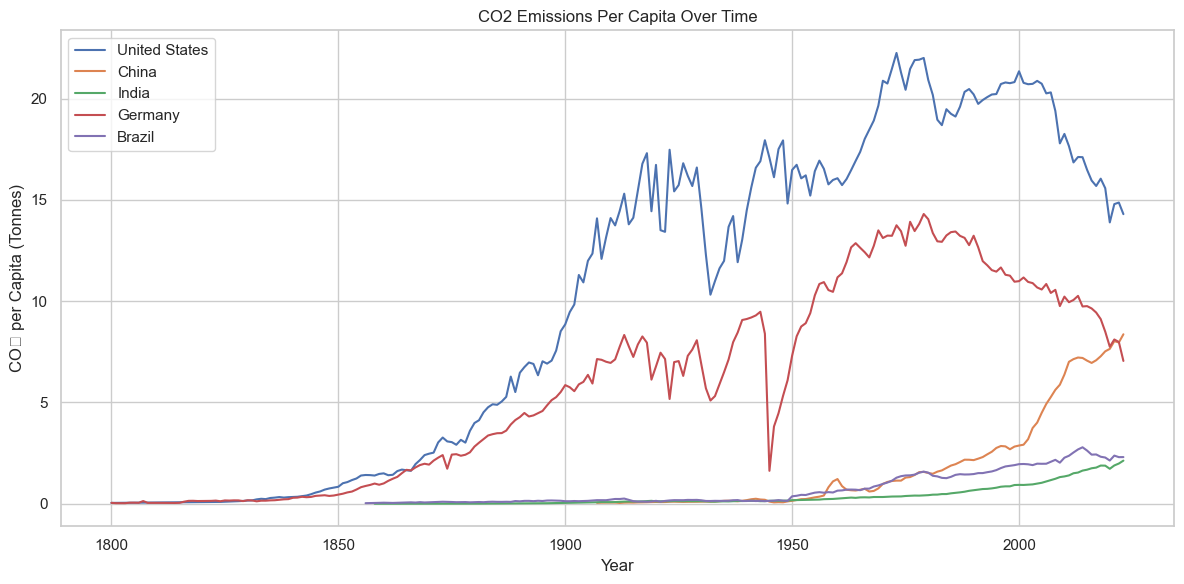

In [77]:
# Choose countries to compare
selected_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']

# Filter dataset
df_selected = df[df['country'].isin(selected_countries)]

# Plot
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df_selected[df_selected['country'] == country]
    plt.plot(country_data['year'], country_data['co2_per_capita'], label=country)

plt.title("CO2 Emissions Per Capita Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ per Capita (Tonnes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Scatter Plot: GDP vs. CO₂ Emissions

C:\Users\92300\AppData\Local\Temp\ipykernel_5720\3704486905.py:10: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()


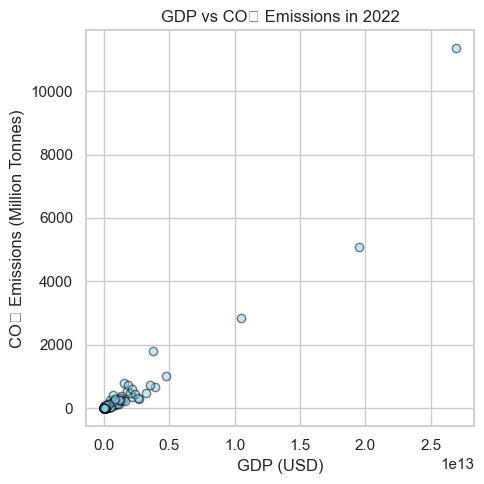

In [78]:
# Use latest year for comparison
scatter_data = df[df['year'] == 2022].dropna(subset=['gdp', 'co2'])

plt.figure(figsize=(5, 5))
plt.scatter(scatter_data['gdp'], scatter_data['co2'], alpha=0.5, c='skyblue', edgecolors='black')
plt.title(f"GDP vs CO₂ Emissions in {2022}")
plt.xlabel("GDP (USD)")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.grid(True)
plt.tight_layout()
plt.show()


Stacked Area Chart: Top Countries’ Contribution Over Time

C:\Users\92300\AppData\Local\Temp\ipykernel_5720\4187237208.py:12: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\92300\Documents\Python\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


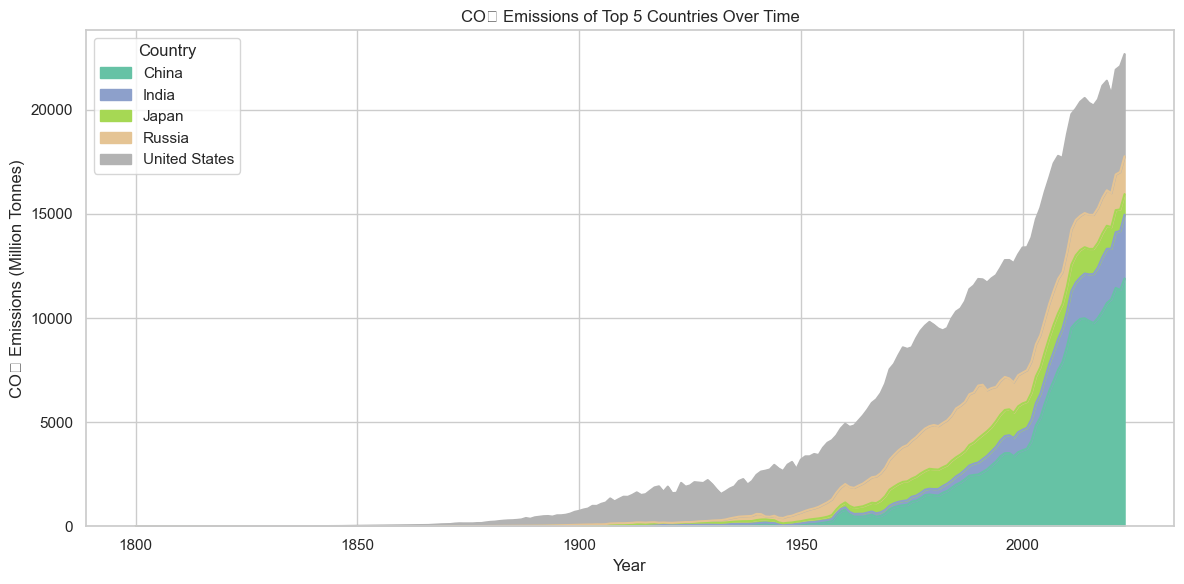

In [79]:
top_countries = df[df['year'] == 2023].sort_values(by='co2', ascending=False).head(5)['country'].tolist()
df_top = df[df['country'].isin(top_countries)]

# Pivot for area plot
pivot_df = df_top.pivot_table(index='year', columns='country', values='co2', aggfunc='sum').fillna(0)

pivot_df.plot.area(figsize=(12, 6), cmap='Set2')
plt.title("CO₂ Emissions of Top 5 Countries Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.legend(title="Country")
plt.tight_layout()
plt.show()
